<a href="https://colab.research.google.com/github/shubhampund9325/Cotton-Disease-Recognition-using-YOLO-Algorithm-/blob/main/Mobilenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Cotton DiseaseDetection using YOLO Algorithm [Transfer Learning ]:


In [5]:
def load_images_and_labels(directory, img_size=(224, 224)):
    images = []
    labels = []
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    try:
                        img = cv2.imread(file_path)
                        img = cv2.resize(img, img_size)
                        images.append(img)
                        labels.append(subdir)
                    except Exception as e:
                        print(f"Error loading image: {file_path}, Error: {e}")
    return np.array(images), np.array(labels)

In [13]:
import os
import shutil
import cv2

# Define paths to the train, test, and val directories
train_path = '/content/drive/MyDrive/Cotton Disease/train'
test_path = '/content/drive/MyDrive/Cotton Disease/test'
val_path = '/content/drive/MyDrive/Cotton Disease/val'
combined_path = '/content/drive/MyDrive/Cotton Disease/val'

# Create the combined directory if it doesn't exist
os.makedirs(combined_path, exist_ok=True)

# Function to check if a file is a valid image
def is_valid_image(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

# Function to copy images from source directory to destination directory
def copy_images(source_dir, dest_dir):
    for subdir in os.listdir(source_dir):
        subdir_path = os.path.join(source_dir, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)

                # Skip hidden files like .DS_Store ...........
                if file.startswith('.'):
                    continue

                # Check if the file is a valid image
                if is_valid_image(file_path):
                    dest_subdir_path = os.path.join(dest_dir, subdir)
                    os.makedirs(dest_subdir_path, exist_ok=True)
                    try:
                        shutil.copy(file_path, os.path.join(dest_subdir_path, file))
                        print(f"Successfully copied: {file_path}")
                    except Exception as e:
                        print(f"Error copying file: {file_path}, Error: {e}")
                else:
                    print(f"Skipping non-image file: {file_path}")

# Copy images from train directory
copy_images(train_path, combined_path)

# Copy images from test directory
copy_images(test_path, combined_path)

# Copy images from val directory
copy_images(val_path, combined_path)

print("Images combined successfully.")

Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (345)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (535)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (218)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (318)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (255)_iaip(1).jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (468)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (544)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (419)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh cotton plant/dsd (597)_iaip.jpg
Successfully copied: /content/drive/MyDrive/Cotton Disease/train/fresh

In [14]:
# Function to count images in a directory (and subdirectories if applicable)
def count_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        count += len([file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])
    return count

# Count images in each dataset
train_size = count_images(train_path)
test_size = count_images(test_path)
val_size = count_images(val_path)

# Print the sizes
print(f"Train Dataset Size: {train_size} images")
print(f"Test Dataset Size: {test_size} images")
print(f"Validation Dataset Size: {val_size} images")

Train Dataset Size: 1951 images
Test Dataset Size: 106 images
Validation Dataset Size: 2300 images


In [15]:
import os
import cv2
import numpy as np

def load_images_and_labels(directory, img_size=(224, 224)):
    images = []
    labels = []
    allowed_extensions = {'.jpg', '.jpeg', '.png'}  # Add extensions as needed

    for root, _, files in os.walk(directory):
        for file in files:
            # Check if file extension is in allowed_extensions
            if os.path.splitext(file)[-1].lower() in allowed_extensions:
                file_path = os.path.join(root, file)
                try:
                    # Load and resize image
                    img = cv2.imread(file_path)
                    img = cv2.resize(img, img_size)
                    images.append(img)

                    # Extract label from directory structure
                    label = os.path.basename(root)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image: {file_path}, Error: {e}")

    # Convert lists to numpy arrays
    images = np.array(images, dtype='float32')
    labels = np.array(labels)

    return images, labels

In [16]:
combined_path = '../Cotton Disease'
X, y = load_images_and_labels(combined_path, img_size=(img_width, img_height))

In [18]:
# Encode labels using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np

if len(y) > 0:
    y = np.array(y).reshape(-1, 1)  # Reshape to 2D array
    encoder = OneHotEncoder(sparse=False)
    y_encoded = encoder.fit_transform(y)
    print("One-hot encoded labels:", y_encoded)
else:
    print("Error: No labels to encode.")

Error: No labels to encode.


In [20]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import matplotlib.pyplot as plt

In [21]:
# Initialize MobileNet pre-trained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Adjust the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,360,580 (12.82 MB)

 Trainable params: 131,716 (514.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [26]:
import os
import cv2
import numpy as np

def load_images_and_labels(directory, img_size=(224, 224)):
    """
    Load images and labels from a dataset directory.

    Args:
        directory (str): Path to the dataset directory (train, test, val).
        img_size (tuple): Target size for image resizing (default: (224, 224)).

    Returns:
        np.ndarray: Preprocessed images.
        np.ndarray: Corresponding labels.
    """
    images = []
    labels = []
    class_names = os.listdir(directory)
    class_mapping = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(class_mapping[class_name])

    images = np.array(images, dtype=np.float32) / 255.0  # Normalize images
    labels = np.array(labels, dtype=np.int32)
    return images, labels

In [28]:
# Define paths to datasets
train_path = '/content/drive/MyDrive/Cotton Disease/train'
test_path = '/content/drive/MyDrive/Cotton Disease/test'
val_path = '/content/drive/MyDrive/Cotton Disease/val'

# Load datasets
X_train, y_train = load_images_and_labels(train_path)
X_test, y_test = load_images_and_labels(test_path)
X_val, y_val = load_images_and_labels(val_path)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")
print(f"Validation data: {len(X_val)} samples")

Training data: 1951 samples
Testing data: 106 samples
Validation data: 2300 samples


In [29]:
from sklearn.preprocessing import LabelBinarizer

# One-hot encode labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training labels shape: (1951, 4)
Testing labels shape: (106, 4)
Validation labels shape: (2300, 4)


In [30]:
import tensorflow as tf

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [31]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Adjust epochs as needed
    validation_data=val_dataset
)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.7069 - loss: 0.7544 - val_accuracy: 0.0248 - val_loss: 5.8650
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.9335 - loss: 0.2057 - val_accuracy: 0.0083 - val_loss: 6.9311
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 292s 4s/step - accuracy: 0.9581 - loss: 0.1316 - val_accuracy: 0.0057 - val_loss: 7.7560
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.9562 - loss: 0.1134 - val_accuracy: 0.0048 - val_loss: 8.2908
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.9693 - loss: 0.0745 - val_accuracy: 0.0039 - val_loss: 8.8445
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.9782 - loss: 0.0654 - val_accuracy: 0.0087 - val_loss: 9.0151
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.9869 - loss: 0.0454 - val_accuracy: 0.0017 - val_loss: 9.1018
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.9852 - loss: 0.0528 - val_accuracy: 0.0035 - v

In [32]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9904 - loss: 0.0301
Test Loss: 0.04181000962853432
Test Accuracy: 0.9811320900917053


In [33]:
# Save the model
model.save('cotton_disease_mobilenet.h5')

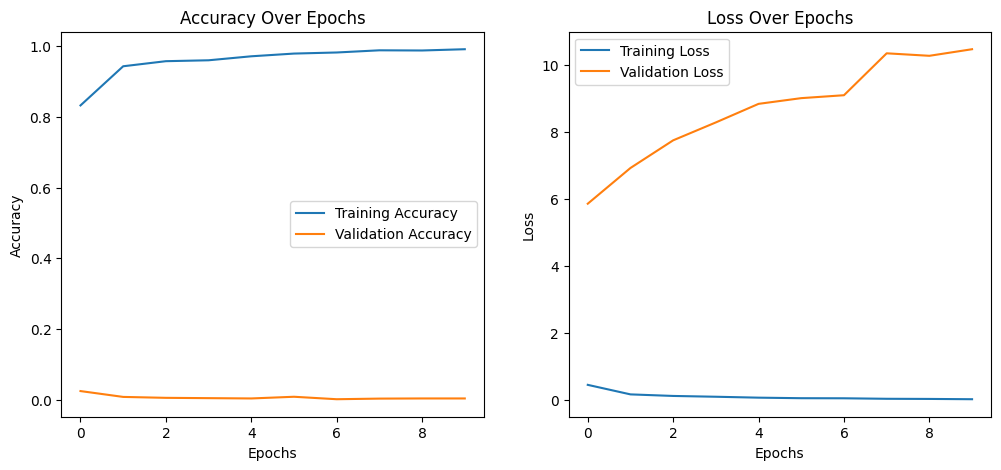

In [34]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# Make predictions
predictions = model.predict(test_dataset)

# Convert predictions to class indices
predicted_classes = tf.argmax(predictions, axis=1).numpy()
true_classes = tf.argmax(y_test, axis=1)

# Print sample results
print("Sample predictions:")
for i in range(5):
    print(f"Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
Sample predictions:
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_image(image_path, class_names):
    """
    Predicts the class of an image using the trained model.

    Args:
        image_path (str): Path to the image to predict.
        class_names (list): List of class labels.

    Returns:
        str: Predicted class label.
        float: Confidence score of the prediction.
    """
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))  # Replace with your model's input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    print(f"Raw predictions: {predictions}")  # Debugging output

    # Get the predicted class index and confidence
    predicted_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_index]

    # Check if predicted index is valid
    if predicted_index >= len(class_names):
        raise ValueError(
            f"Predicted index {predicted_index} exceeds the number of class labels in class_names {len(class_names)}."
        )

    # Map predicted index to class label
    predicted_class = class_names[predicted_index]

    return predicted_class, confidence

In [44]:
class_names = ['fresh cotton leaf', 'fresh cotton plant', 'diseased cotton leaf', 'diseased cotton plant']

# Example: Predict for a sample image
image_path = "/content/cotton2.jpeg"
predicted_class, confidence = predict_image(image_path, class_names)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Raw predictions: [[0.03159565 0.00178414 0.9547746  0.01184561]]
Predicted Class: diseased cotton leaf
Confidence Score: 0.95
